In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor

In [2]:
def f1(x):
    return x**2/20 + np.sin(2*x)

((200, 1), (200,))

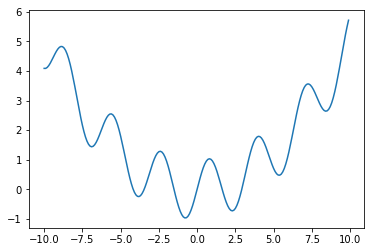

In [3]:
x = np.arange(-10, 10, 0.1).reshape(-1,1) # shape: [n_sample*n_in] (n_in=1 here)
y_true = f1(x).ravel() # sklearn expects flat y (though column x)
plt.plot(x, y_true) 
x.shape, y_true.shape

- Only L-BFGS works. SGD and Adam is useless in this case.
- Need to make `max_iter` much higher than default

In [4]:
nn = MLPRegressor(hidden_layer_sizes=(10), 
                  activation='tanh', solver='lbfgs', max_iter=2000)
n = nn.fit(x, y_true)

In [5]:
n.loss_

0.0073988480606037351

In [6]:
[p.shape for p in n.intercepts_]

[(10,), (1,)]

In [7]:
[p.shape for p in n.coefs_]

[(1, 10), (10, 1)]

In [8]:
y_pred = nn.predict(x)

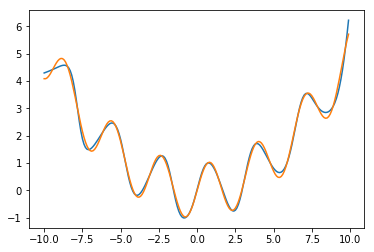

In [9]:
plt.plot(x, y_pred)
plt.plot(x, y_true)